**4.- Redes Neuronales Multicapa con dataset Iris**

**a.- Utilice el dataset Iris. Divida los datos en train (80%) y test (20%).**

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
iris = load_iris()
X=iris.data
Y=iris.target
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2)

**b.- Regularice los datos (solo los de entrenamiento). Siempre es una buena práctica escalar los features para que todos ellos puedan ser evaluados uniformemente. La regularización es realizada solo sobre los datos de entrenamiento y no sobre los de prueba. Esto es porque en el mundo real, los datos no son escalados y el propósito último del clasificador es hacer predicciones de estos datos.**

**Utilice la librería de Python para escalar: from sklearn.preprocessing import StandardScaler**

In [0]:
scaler = StandardScaler()
xTrain=scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

**c.- Aplique el algoritmo MLPClassifier() de from sklearn.neural_network import MLPClassifier para entrenar una red neuronal multicapa con 3 capas ocultas de 10 neuronas cada una.**

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(3,10),random_state=0)
mlp.fit(xTrain,yTrain)
pred = mlp.predict(xTest)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**d.- Evalue el modelo entrenado.**

Original class:    [0 1 1 2 2 1 2 1 0 2 0 1 0 2 2 0 1 1 1 1 0 0 1 0 0 2 1 2 1 0]
Predicted class:   [0 1 1 2 2 2 2 1 0 2 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 2 2 2 1 0]
Training accuracy: 0.92
Test accuracy: 0.87


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.83      0.83        12
           2       0.75      0.75      0.75         8

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



Text(37.32000000000001, 0.5, 'valor predicho')

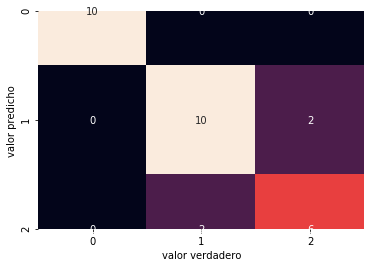

In [63]:
print("Original class:   ",yTest)
print("Predicted class:  ",pred)
print("Training accuracy: {:.2f}".format(mlp.score(xTrain,yTrain)))
print("Test accuracy: {:.2f}".format(mlp.score(xTest,yTest)))
print("\n\nClassification Report")
print(classification_report(yTest,pred))
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')

**e.- Compare con otros clasificadores vistos entrenados con este dataset**

**SVM Gaussian(RBF)**

---

Best Parameters:  {'C': 2, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Scoring: 0.96

Original class:    [0 1 1 2 2 1 2 1 0 2 0 1 0 2 2 0 1 1 1 1 0 0 1 0 0 2 1 2 1 0]
Predicted class:   [0 1 1 2 2 1 2 1 0 2 0 1 0 2 2 0 1 1 1 1 0 0 1 0 0 2 1 2 1 0]
Training accuracy: 0.97
Test accuracy: 1.00


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 2, 5, 10, 50, 100, 150, 200],
                          'degree': [2],
                          'gamma': [0.1, 0.5, 2, 5, 10, 50, 100, 150],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

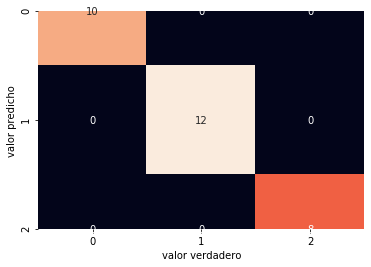

In [71]:
def evaluateModel(kernels,degree=[2]):
  parameters = [{'gamma':[0.1,0.5,2,5,10,50,100,150],
               'C':[0.5,1,2,5,10,50,100,150,200],
               'kernel':kernels,
               'degree':degree}]
  svc = SVC()
  grid_search = GridSearchCV(estimator = svc, param_grid = parameters, cv= 5, n_jobs = -1, scoring = 'accuracy')
  grid_search.fit(xTrain,yTrain)
  pred=grid_search.predict(xTest)
  print("Best Parameters: ", grid_search.best_params_)
  print("Best Scoring: {:.2f}".format(grid_search.best_score_))
  print("\nOriginal class:   ",yTest)
  print("Predicted class:  ",pred)
  print("Training accuracy: {:.2f}".format(grid_search.score(xTrain,yTrain)))
  print("Test accuracy: {:.2f}".format(grid_search.score(xTest,yTest)))
  mat = confusion_matrix(yTest, pred)
  sns.heatmap(mat.T, square=True, annot=True, cbar=False)
  plt.xlabel('valor verdadero')
  plt.ylabel('valor predicho')
  print("\n\nClassification Report")
  print(classification_report(yTest,pred))
  return grid_search
evaluateModel(['rbf'])

Se puede notar como el modelo SVM comparado con MLPClassifier posee mejor accuracy y por lo tanto arroja predicciones con mayor precision.
Sin embargo se pueden realizar algunas correcciones para que el modelo MLPClassifier sea un poco mas competitivo, como por ejemplo aumentar las iteraciones maximas ya como se ve en el warning el modelo no llega a converger y modificar alpha para obtener una mejor generalizacion.

Original class:    [0 1 1 2 2 1 2 1 0 2 0 1 0 2 2 0 1 1 1 1 0 0 1 0 0 2 1 2 1 0]
Predicted class:   [0 1 1 2 2 1 2 1 0 2 0 1 0 2 2 0 1 1 1 1 0 0 1 0 0 2 2 2 1 0]
Training accuracy: 0.94
Test accuracy: 0.97


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(37.32000000000001, 0.5, 'valor predicho')

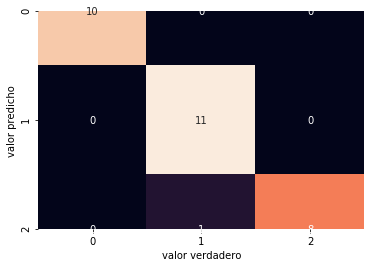

In [74]:
mlp = MLPClassifier(hidden_layer_sizes=(3,10),random_state=0,max_iter=500, alpha=1)
mlp.fit(xTrain,yTrain)
pred = mlp.predict(xTest)
print("Original class:   ",yTest)
print("Predicted class:  ",pred)
print("Training accuracy: {:.2f}".format(mlp.score(xTrain,yTrain)))
print("Test accuracy: {:.2f}".format(mlp.score(xTest,yTest)))
print("\n\nClassification Report")
print(classification_report(yTest,pred))
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')